<center> <img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars/sem_6/student_teacher_dist.png" height="200"> </center>

# <center> R для тервера и матстата. <br>  <br> Домашка номер два! </center>

__Брифинг:__ 

1. [скрррааа па па ка ка ка скидики па па энд э пу пу дррр бум скьа ду ду ку ку тун тун пум пум (c)](https://www.youtube.com/watch?v=3MVoH6elV30)
2. Обязательно фиксируйте зерно генератора случайных чисел в экспериментах. При перезапуске кода значения не должны меняться :)
3. Залейте тетрадку с решением на Google Colab. Нажмите кнопку share. Разрешите по ней редактировать тетрадку. Залейте ссылку в форму для сдачи домашек. 
4. __Дедлайн: 20 июня__
5. [На страничке курса](https://github.com/FUlyankin/r_probability) есть решение домашек прошлого года. Ими можно пользоваться.
6. Если вам не нравится R и вы можете писать код на python, пишите код на python. Это разрешено. 

In [1]:
from scipy import stats
import numpy as np
import math
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import random
plt.style.use('ggplot')
%matplotlib inline

-------------------------------------------

Попробуйте самостоятельно реализовывать все критерии и доверительные интервалы в виде функций. На вход в эти функции должны попадать данные, на выходе должны оказываться разные полезности и результаты. Например, вот так можно было бы попробовать написать критерий для проверки гипотезы о доли. 

In [ ]:
z.prop = function(m, n, p0, alpha=0.05, alternative="two-sided"){
  
  p_hat = m/n                       # оценка вероятности 
  sd_p = sqrt(p_hat*(1-p_hat)/n)    # дисперсия оценки
  z_stat = (p_hat - p0)/sd_p        # наблюдаемое значение

  # В зависимости от типа альтернативы делаем расчёты
  if(alternative == 'two-sided'){
      p_val <- 2*pnorm(-abs(z_stat))
      z_crit <- qnorm(1-alpha/2)
  }
  if(alternative == 'lower'){
      p_val <- pnorm(-abs(z_stat))
      z_crit <- qnorm(alpha)
  }
  if(alternative == 'greater'){
      p_val <- 1 - pnorm(abs(z_stat))
      z_crit <- qnorm(1-alpha/2)
  }
    
  # Возвращаем результаты проверки гипотезы в виде списка
  return( list(estimate = p_hat, 
               z_crit = z_crit,
               z_stat = z_stat,
               p_val = p_val,
               alternative = alternative))
}

result <- z.prop(52, 100, 0.5, alpha=0.01, alternative = 'greater')
result

$estimate
[1] 0.52

$z_crit
[1] 2.575829

$z_stat
[1] 0.4003204

$p_val
[1] 0.3444603

$alternative
[1] "greater"

In [ ]:
result$p_val # можно по именам из листа доставать разные циферки :3

[1] 0.3444603

Если кишка тонка писать свои функции, пользуйтесь готовыми. Но имейте в виду, что не все критерии, которые понадобятся вам в этой тетрадке, реализованы в R в виде одной команды. Если есть желание, можете снабдить выдачу картинками по аналогии с тем, как мы делали это на лекции. Не путайте картинки местами! Например, не вздумайте использовать картинку для нормального распределения для t-критерия! Если код в ggplot кажется вам тяжёлым, можете попробовать рисовать картинки, [как во втором ответе тут.](https://stackoverflow.com/questions/36508020/can-r-visualize-the-t-test-or-other-hypothesis-test-results)

Красивые функции для картинок [можно взять из тетрадки про доверительные интервалы,](https://nbviewer.jupyter.org/github/FUlyankin/r_probability/blob/master/end_seminars_2021/sem05/old_notebooks/Confidence_intervals.ipynb) либо [из тетрадки про проверки гипотез.](https://nbviewer.jupyter.org/github/FUlyankin/r_probability/blob/master/end_seminars_2021/sem05/old_notebooks/hypotesis.ipynb) Все эти же штуки ест [на курсере](https://github.com/FUlyankin/matstat_coursera) в более продвинутом виде. 

----------------------------

## [20] Задачка 1: Парковка


Перед выборами в центре города открыли неразмеченную парковку длиной $100$ метров. Каждый приезжающий водитель случайным образом выбирает место длиной $2$ метра, и если место оказалось свободным, встает на парковку до конца дня. Если он не помещается в выбранный отрезок, то водитель в нервном состоянии уезжает с парковки. За один день на парковку пытается встать $1000$ проезжающих мимо водителей. Для выполнения всех пунктов заданий проведите $2000$ симуляций. __Для простоты будем считать, что выбор точки на парковке - это центр машины.__

__а)__ В среднем сколько машин оказываются припаркованы к концу дня?

In [6]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ сккккрааа!
N = 2000 # количество симуляций
def sim (n):
    random.seed(42)
    attempts = np.random.uniform(0, 100, size = n)
    parking = []
    for a in attempts:
        if a >= 1 and a <= 99:
            if len(parking) == 0:
                parking.append(a)
            elif not sum(list(map(lambda x: x < a+2 and x > a-2, parking))):
                parking.append(a)
    return len(parking)
list_cars = []
for i in range(N):
    list_cars.append(sim(1000))

__б)__ Постройте $95$\%-ый доверительный интервал для ожидаемого количества машин припаркованных к концу дня.

In [9]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ скибиди па!
cars_mean = np.array(list_cars).mean()
alpha = 0.05
z_crit = stats.norm.ppf(1-alpha/2)
var = np.array(list_cars).var(ddof = 1)
n = 2000
delta = z_crit*np.sqrt(var/n)
print(f'({cars_mean-delta}, {cars_mean+delta}) - доверительный интервал для ожидаемого количества машин на парковке')

(36.25895953980297, 36.38204046019703) - доверительный интервал для ожидаемого количества машин на парковке


__в)__ Постройте $95$\%-ый доверительный интервал для ожидаемого количества свободного места на парковке к концу дня (в метрах).

In [14]:
### ╰( ͡° ͜ʖ ͡° )つ──☆  пррррррр
free_place = np.array(list(map(lambda x: 100-2*x, list_cars)))
mu_hat = free_place.mean()
alpha = 0.05
z_crit = stats.norm.ppf(1-alpha/2)
var = free_place.var(ddof = 1)
n = 2000
delta = z_crit*np.sqrt(var/n)
print(f'({mu_hat-delta}, {mu_hat+delta}) - доверительный интервал для ожидаемого количества машин на парковке')

(27.235919079605946, 27.482080920394058) - доверительный интервал для ожидаемого количества машин на парковке


__г)__ После возникшего хаоса на парковку добавили регулярную разметку для мест длиной $2$ метра, но водители разделились на два лагеря — тех, кто соблюдает и не соблюдает правила разметки. С вероятностью $p$ приезжает честный водитель и занимает случайное свободное место строго по разметке. Водители второго лагеря паркуются, как раньше. 

Нарисуйте график, где по оси ординат – процент честных водителей, а по оси абсцисс – процент свободного места на парковке к концу дня для вероятностей $p$ равным от $0$ до $1$ с шагом в $5\%$. Для каждого порога вероятности проведите по $500$ симуляций.

In [52]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ ратата!
def new_sim():
    num_cars = []
    for p in np.linspace(0, 1, 21):
        places = list(range(1, 100, 2))
        parking = []
        for c in range(1000):    
            if np.random.binomial(1, p):
                for c in places:
                    if len(parking) == 0 or not sum(list(map(lambda x: x < c+2 and x > c-2, parking))):
                        parking.append(c)
                        places.remove(c)
                        break
            else:
                c = np.random.uniform(0, 100)
                if len(parking) == 0 or not sum(list(map(lambda x: x < c+2 and x > c-2, parking))):
                        parking.append(c)
        num_cars.append(len(parking))
    return num_cars

21

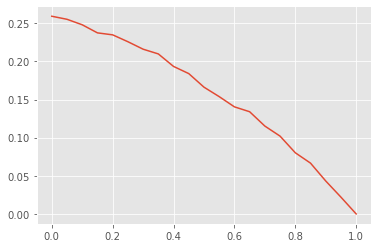

In [58]:
N = 100
vec = (-2*np.array(new_sim())+100)/100
for i in range(N-1):
    vec += (-2*np.array(new_sim())+100)/100
vec = vec/N
plt.plot(np.linspace(0, 1, 21), vec);

## [30] Задачка 2: продуктовые метрики


Чтобы держать руку на пульсе бизнеса, нужно строить довольно много продуктовых метрик. Более того, нужно понимать насколько адекватно эти метрики построены и насколько сильно они могут колебаться.

__Словарик:__ 

* __retention__ - возвращаемость пользоватяля к использованию продукта через $n$ дней (через день, два, неделю и тд) 
* __RPU__ - выручка на юзера, купившего товар (revenue per user) 
* __DAU__ - дневная активная аудитория (daily active user) 
* __LTV__ - совокупная прибыль, полученная за всё время сотрудничества с клиентом (Lifetime Value) 



Анализировать будем данные по продажам в [гугловом мерчендайз магазине.](https://www.kaggle.com/c/ga-customer-revenue-prediction) Скачайте [табличку с данными с гита.](https://github.com/FUlyankin/r_probability/blob/master/data/marketing_log.csv)

- Для решения задачи используйте библиотеку `dplyr` для работы с таблицами. Никаких циклов! Только `groupby`, трубочки, фильтры и тп. 
- В текстовых полях с выводами не надо писать огромные абзацы текста. Пишите тезисно. 

In [63]:
df = pd.read_csv('C:/Users/DNS/Desktop/R для теорвера и матстата/marketing_log.csv', sep ='\t')
df.head()

C:\Users\DNS\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,date,fullVisitorId,browser,deviceCategory,transactionRevenue
0,2016-09-02,1131660440785968503,Chrome,desktop,NaN
1,2016-09-02,377306020877927890,Firefox,desktop,NaN
2,2016-09-02,3895546263509774583,Chrome,desktop,NaN
3,2016-09-02,4763447161404445595,UC Browser,desktop,NaN
4,2016-09-02,27294437909732085,Chrome,mobile,NaN


__[3]__ Сколько людей пользовались магазином в среднем в течение дня/месяца? Постройте дневной график с суммарным числом пользователей, заходивших на сайт. Постройте месячный график. 

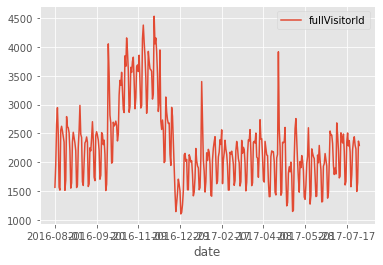

In [7]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ пау! пау! пау!
per_day = df.groupby('date').agg({'fullVisitorId': 'nunique'})
per_day.plot();
df_month = df.copy()
df_month.date = pd.to_datetime(df.date.values).strftime('%Y-%m-01')

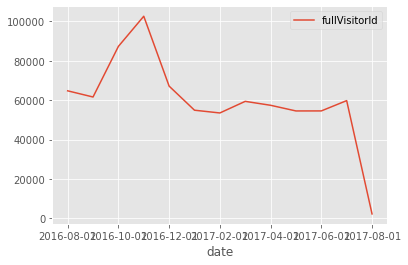

In [8]:
per_month = df_month.groupby('date').agg({'fullVisitorId': 'nunique'})
per_month.plot();

Проинтепретируйте график: 

* Наблюдается ли на нём сезонность? Какая она? 
* Когда в посещении сайта произошёл резкий всплеск? Как думаете с чем это связано? 
* Хороша ли эта метрика для оценки бизнеса? В чём её минусы?  

__Ответ:__

__[1]__ Постройте график с числом пользовательских сессий. Насколько он сильно отличается от графика с числом уникальных пользователей. Как думаете о чём это может сигнализировать?  

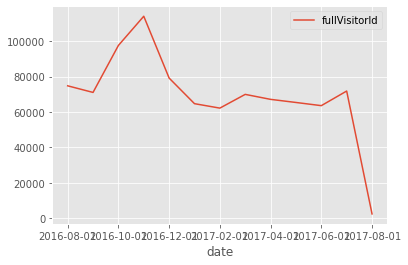

In [10]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ Сккккраааа
df_month.groupby('date').agg({'fullVisitorId': 'count'}).plot();

### Посмотрим на возвращаемость пользователей (retention)

* `retention_1`  - вернулся ли игрок после **первого** дня с момента посещения магазина?
* `retention_7`  - вернулся ли игрок после **седьмого** дня с момента посещения магазина?

__[2]__ Заведите колонку: _дата первого появления юзера._ Посмотрите на то, как распределено число дней между текуим и первым посещением. Для этого постройте гистограмму.  Что интересного вы на ней видите? 

__Ответ:__ 

In [11]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ кря
first_time = df.groupby('fullVisitorId').agg({'date': 'min'})
first_time.columns = ['first time']
df1 = df.join(first_time, on = 'fullVisitorId')

__[1]__ Создайте колонку с разностью в днях между первым и последним посещениями. Назовите её `daysFromFirstVisit`.

In [12]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ ррррааа!
df1[['date', 'first time']] = df1[['date', 'first time']].apply(pd.to_datetime)
df1['daysFromFirstVisit'] = df1.date - df1['first time']
df1.head()

,date,fullVisitorId,browser,deviceCategory,transactionRevenue,first time,daysFromFirstVisit
0,2016-09-02,1131660440785968503,Chrome,desktop,NaN,2016-09-02,0 days
1,2016-09-02,377306020877927890,Firefox,desktop,NaN,2016-09-02,0 days
2,2016-09-02,3895546263509774583,Chrome,desktop,NaN,2016-09-02,0 days
3,2016-09-02,4763447161404445595,UC Browser,desktop,NaN,2016-09-02,0 days
4,2016-09-02,27294437909732085,Chrome,mobile,NaN,2016-08-10,23 days


In [13]:
df1.daysFromFirstVisit = df1.daysFromFirstVisit.map(lambda x: x.days)

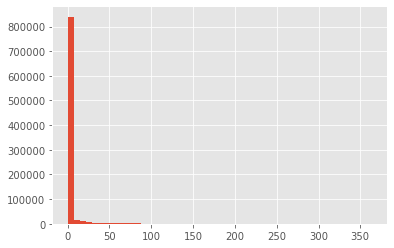

In [16]:
DF1V = df1.daysFromFirstVisit
DF1V.hist(bins = 50);

__[1]__ Посчитаем `retention_7`. Если `daysFromFirstVisit` оказывается больше $7$, значит человек вернулся более, чем через $7$ дней после первого посещения. Доля таких людей для каждого дня и есть `retention_7`. Найдите её для каждого дня и постройте картинку. 

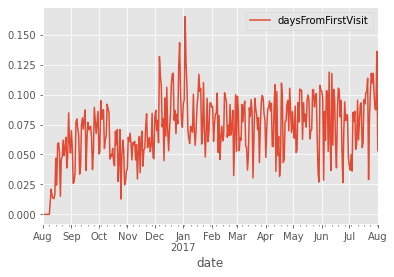

In [18]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ гггггррррааа!
retention_7 = df1.groupby('date').agg({'daysFromFirstVisit': lambda x: len(x[x>7])/len(x)})
retention_7.plot();

__[1]__ Есть много точечных оценок доли людей, которая возвращается для каждой даты. Но этого мало, каждая точка строится по разному числу наблюдений и нам хотелось бы понимать насколько оценка точная. Возвращаемость - это доля. Значит можно построить для неё $95\%$ доверителльный интервал с помощью ЦПТ:

$$
\hat p \pm z_{1 - \frac{\alpha}{2}} \cdot \sqrt{\frac{\hat p \cdot (1 - \hat p)}{n}} 
$$

In [31]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ эщкере
retention = df1.groupby('date')['daysFromFirstVisit'].agg(lambda x: len(x[x>0])/len(x))
alpha = 0.05
z_alpha = stats.norm.ppf(1-alpha/2)
p_hat = retention.mean()
var = p_hat*(1-p_hat)/len(retention)
z_right = p_hat + z_alpha*np.sqrt(var) 
z_left = p_hat + z_alpha*np.sqrt(var) 
print(f'Доверительный интервал для доли - ({z_left}, {z_right})')

Доверительный интервал для доли - (0.14956943629937713, 0.14956943629937713)


__[1]__ Постройте для семидневной возвращаемости $95\%$ [доверительный интервал Уилсона.](https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval)

$$\frac1{ 1 + \frac{z^2}{n} } \left( \hat{p} + \frac{z^2}{2n} \pm z \sqrt{ \frac{ \hat{p}\left(1-\hat{p}\right)}{n} + \frac{
z^2}{4n^2} } \right), \;\; z \equiv z_{1-\frac{\alpha}{2}}$$ 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ бррря

__[1]__ В каких ситуациях он обычно используется? Как его можно вывести? Шире он получился или уже? Как думаете, почему? 

__Ответ:__

__[3]__ Финальный заход на анализ возвращаемости. [Построим heatmap](http://www.sthda.com/english/wiki/ggplot2-quick-correlation-matrix-heatmap-r-software-and-data-visualization) с возвращаемостью по когортам. За когорту будем рассматривать людей, пришедших в течение конкретного месяца. Должна получиться примерно такая картинка: 

![](https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars_2020/HW/retention.png) 


По оси $y$ откладывайте месяц первого прихода. По оси $x$ откладывается месяц, на который мы смотрим __retention.__ Например, клетка на пересечении да `2017-01` по $x$ и `2016-08` по $y$ - число людей, которые вернулис на сайт в январе $2017$ и при этом зарегистрировались в августе $2016$. 

__[1]__ Какие выводы вы можете сделать о возврате пользователей после всех манипуляций с retention? 

__Ответ:__

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ як! як! як!

### Проанализируем продажи.

__[1]__ Какой процент людей, зашедших на сайт делает покупки?

In [81]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ антихайп
df.transactionRevenue = df.transactionRevenue.replace(df.transactionRevenue.iloc[0], np.nan)
purchases = df.groupby('fullVisitorId').agg({'transactionRevenue': 'count'})
purchases.transactionRevenue[purchases.transactionRevenue>1] = 1
purchases.transactionRevenue.mean()

0.013944555666703617

__[1]__ После какого посещения они делают свою первую покупку? Постройте гистограмму.

In [82]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ антихайп
id_buyers = purchases[purchases.transactionRevenue>0].index

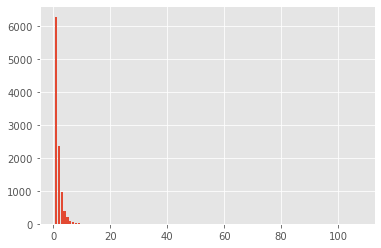

In [209]:
buyers = df[df.fullVisitorId.isin(id_buyers)]
buy_after = buyers.groupby('fullVisitorId').agg({'transactionRevenue': lambda x: list(x.isna()).index(False)+1})
for_bar = buy_after.reset_index().groupby('transactionRevenue').count().fullVisitorId
plt.bar(for_bar.index, for_bar.values);

__[1]__ Сколько покупок делает один пользователь? Постройте гистограмму числа покупок.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000282B872ED00>]],
      dtype=object)

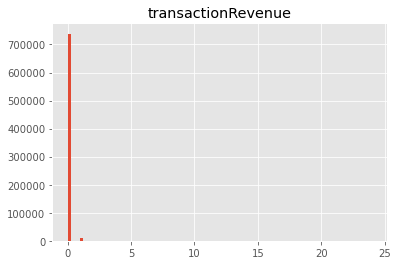

In [119]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ ка ка ка ка ка
df.groupby('fullVisitorId').agg({'transactionRevenue': 'count'}).hist(bins = 100);

__[1]__ Отберите в маленькую табличку все записи лога, которые соотвествуют покупке. 

In [133]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ врум пум пум пум пум
money_dist = df[df.transactionRevenue.notna()].transactionRevenue

__[1]__ Посмотрите на то как выглядит распределение стоимости покупок.

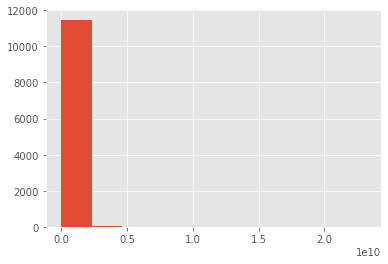

In [135]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ дррррр бум
money_dist.hist();

В данных явно есть выбросы. Видно, что у распределения очень длинный хвост. Нам хотелось бы построить для средней выручки с пользователя доверительный интервал, но выбросы будут мешать нам использовать ЦПТ, которая предполагает что все случайные величины, участвующие в поиске среднего имеют одинаковое распределение, и аномалии не встречаются. 

__[1]__ Давайте избавимся от выбросов. Для этого найдите $95\%$ квантиль и срежте все наблюдения, где выручка больше него. Снова постройте гистограмму. 

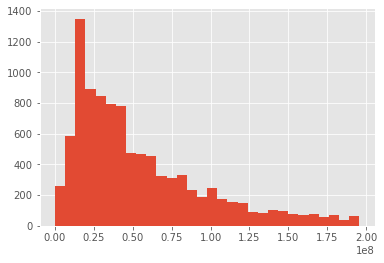

In [141]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ гра трааа
money_dist = money_dist[money_dist < money_dist.quantile(0.95)]
money_dist.hist(bins = 30);

__[1]__ Посчитайте по выручке среднее, стандартное отклонение и число наблюдений для каждого месяца.

In [159]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ ууууууу
rev = df[df.transactionRevenue.notna()]
rev.date = np.array(pd.to_datetime(rev.date.values).strftime('%Y-%m-01'))

In [197]:
rev_per_month = rev.groupby('date').agg({'transactionRevenue': ['mean', 'std', 'count']})
rev_per_month = rev_per_month.applymap(lambda x: round(x, 1))
rev_per_month.index = pd.to_datetime(rev_per_month.index)
rev_per_month


transactionRevenue                   
                         mean          std count
date                                            
2016-08-01        138218552.3  266405175.7  1119
2016-09-01        146718556.5  589068834.1   859
2016-10-01        129964529.8  252377237.7   872
2016-11-01        129503667.0  273744904.8   919
2016-12-01        110794215.1  302059346.5  1395
2017-01-01        140427245.3  266543180.9   697
2017-02-01        153610904.0  707950909.4   708
2017-03-01        148317406.6  400259738.8   883
2017-04-01        171108620.7  899037337.4   928
2017-05-01        109158278.0  255379892.9  1115
2017-06-01        128508974.6  374166694.7   946
2017-07-01        120755848.7  409390712.9  1031
2017-08-01        193138139.5  478700758.3    43

__[1]__ Наконец, воспользуемся формулой для строительства доверительного интервала для среднего: 

$$
\hat \mu \pm z_{1 - \frac{\alpha}{2}} \cdot \sqrt{\frac{\hat{\sigma}^2}{n}}.
$$

Изобразите месячную динамику средней RPU на картинке. Нанесите на неё $95\%$ доверительный интервал. 

(125556925.92, 141932651.16) - доверительный интервал для среднего


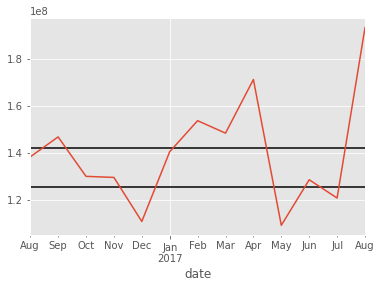

In [199]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ юцубуцу
n = len(rev.transactionRevenue)
alpha = 0.05
mu_hat = rev.transactionRevenue.mean()
var_hat = rev.transactionRevenue.var(ddof=1)
z_alpha = stats.norm.ppf(1-alpha/2)
left = round(mu_hat - z_alpha*np.sqrt(var_hat/n), 2)
right = round(mu_hat + z_alpha*np.sqrt(var_hat/n), 2)
print(f'({left}, {right}) - доверительный интервал для среднего')
ax = rev_per_month[('transactionRevenue',  'mean')].plot()
ax.hlines(right, rev_per_month.index[0], rev_per_month.index[-1])
ax.hlines(left, rev_per_month.index[0], rev_per_month.index[-1]);

__[1]__ С каких устройств (колонка `deviceCategory`) покупки осуществляются чаще всего? Постройте столбиковую диаграмму для числа покупок с каждого типа девайска (десктоп, мобила, планшет).  

,transactionRevenue
deviceCategory,
desktop,10495
mobile,852
tablet,168


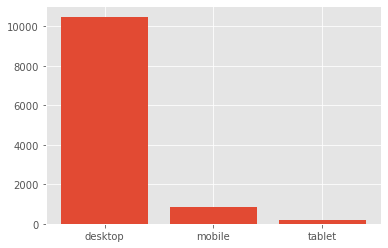

In [220]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ дра
dev_dist = rev.groupby('deviceCategory').agg({'transactionRevenue': 'count'})
plt.bar(dev_dist.index, dev_dist.transactionRevenue.values);
dev_dist

__[2]__ Как выручка распределена по устройствам? Постройте ящик с усами или виалончель, чтобы посмотреть на это. 

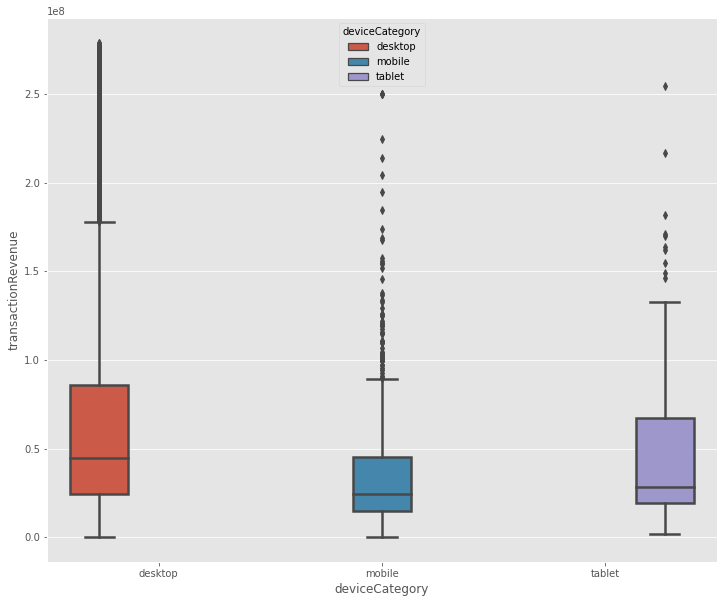

In [242]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ фра
rev_dist = rev.pivot(columns = 'deviceCategory', values = 'transactionRevenue')
rev_dist = rev_dist.apply(lambda x: x[x<x.quantile(0.9)])
fig = plt.figure(figsize = (12,10))
sb.boxplot(x="deviceCategory", y="transactionRevenue", hue="deviceCategory",
                 data=rev[rev.transactionRevenue < rev.transactionRevenue.quantile(0.9)], linewidth=2.5)

__[2]__ Проверьте гипотезу о том, что число среднняя выручка с десктопа больше, чем с мобилы и планшета. Строго опишите ту процедуру, которую вы используете для проверки этой гипотезы. 

Используем проверку гипотезы о разности средних, за гипотезу H0 берем утверждение о равенстве средних. за H1 - среднее с десктопа выше. Гипотеза берется на основе ЦПТ - так как наблюдений по всем трем генеральным совокупностям достаточно

In [256]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ скрррааа па па ка ка ка скидики па па энд э пу пу дррр бум скьа ду ду ку ку тун тун пум пум
alpha = 0.05
a1 = rev_dist.desktop.mean()
a2 = rev_dist.mobile.mean()
a3 = rev_dist.tablet.mean()
var1 = rev_dist.desktop.var(ddof=1)
var2 = rev_dist.mobile.var(ddof=1
var3 = rev_dist.tablet.var(ddof=1)
n1, n2, n3 = rev_dist.count().values
# для начала проверка гипотезы о равенстве средних для desktop и tablet:
u_obs = (a1-a3)/np.sqrt(var1/n1 + var3/n3)
z_right = stats.norm.ppf(1-alpha)
print(f'Наблюдаемое значение критерия {u_obs} > {z_right} - критической точки => гипотеза H0 отвергается и принимается альтернативная'))
# теперь то же самое для desktop и mobile:
u_obs = (a1-a2)/np.sqrt(var1/n1 + var2/n2)
print(f'Наблюдаемое значение критерия {u_obs} > {z_right} - критической точки => гипотеза H0 отвергается и принимается альтернативная')

Наблюдаемое значение критерия 11.243138709250003 > 1.6448536269514722 - критической точки => гипотеза H0 отвергается и принимается альтернативная
Наблюдаемое значение критерия 37.99495007175917 > 1.6448536269514722 - критической точки => гипотеза H0 отвергается и принимается альтернативная


__[2]__ На основе всего проведённого анализа сделайте выводы о текущем состоянии магазина и дайте ему пару советов: 

__Ответ:__ 

## [10] Задачка 3: стабилизация дисперсии

Пусть $X_n \sim Poiss(\lambda)$. Мы не знаем параметр $\lambda$ и хотим построить для него доверительный интервал. По ЦПТ 

$$\hat \lambda = \bar x \sim N \left(\lambda, \frac{\lambda}{n} \right).$$

Для того, чтобы было возможно построить доверительный интервал мы можем: 

1. Заменить в дисперсии $\lambda$ на его оценку, а затем построить доверительный интервал. На асимптотику это никак не повлияет.
2. Применить преобразование для стабилизации дисперсии и построить доверительный интервал.

Подробее про все три процедуры смотрите конспект лекции. 

Постройте все три $95\%$-х интервала для всех комбинаций $n \in \{10, 100, 1000 \}$ и $\lambda \in \{1, 5, 100\}$. Для каждой ситуации сделайте это $1000$ раз. 

__а)__ Оцените вероятность того, что доверительный интервал содержит истиное значение $\lambda$. Всегда ли она соответствует $95\%$? 

__б)__ Найдите среднюю длину интервала для каждой из ситуаций. Какой доверительный интервал оказывается самым коротким?

__в)__ Есть ли существенная разница, какую из двух процедур использовать?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ пум пум пум пум пум

## [10] Задачка 4: реклама


__Чётко выпишите проверяемую гипотезу. Чётко обоснуйте выбранный для её проверки критерий, выпишите все предпосылки, которые вы используете.__

Новый корм для котиков рекламируется с помощью рекламного баннера. Отдел маркетинга разработал для рекламы новый баннер. Они считают, что он более красивый. Перед фирмой возникла необходимость проверить какой из двух баннеров лучше. 

Для этого была создана специальная веб-форма. В этой веб-форме людям по очереди демонстрировали оба баннера и просили поставить лайк, если баннер нравится человеку. Если человеку нравятся оба баннера, он может поставить два лайка. Если ему не нравится ни один баннер, он может не ставить лайки вовсе. Собранные в конечном итоге данные находятся в [табличке.](https://yadi.sk/i/9Z5N-6PM3XN8on)

Можно ли утверждать, что оба баннера одинаково хороши? Не забудьте найти p-значение.

In [269]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ врум
opinions = pd.read_csv('C:/Users/DNS/Downloads/banner_click_stat.csv', sep = '\t', header = None)
display(opinions[opinions[0] != opinions[1]])
p_1 = opinions[0].mean()
p_2 = opinions[1].mean()
n = len(opinions[0])
nu = p_2 - p_1
var = p_1*(1-p_1)/n + p_2*(1-p_2)/n
u_obs = nu/np.sqrt(var)
z_crit = stats.norm.ppf(1-alpha/2)
print(f'Наблюдаемое значение критерия {u_obs} принадлежит критической области ({-z_crit}, {z_crit}) => гипотеза H0 принимается')
print(f'на уровне значимости 0.05 можно говорить о том, что оба банера нравятся людям одинаково')
print(f'p_value = {2*stats.norm.cdf(-u_obs)}')

,0,1
89,1,0
154,0,1
186,0,1
192,0,1
253,0,1
279,0,1
310,1,0
327,1,0
329,1,0
351,0,1


Наблюдаемое значение критерия 1.7271126578424703 принадлежит критической области (-1.959963984540054, 1.959963984540054) => гипотеза H0 принимается
на уровне значимости 0.05 можно говорить о том, что оба банера нравятся людям одинаково
p_value = 0.08414743276119413


## [10] Задачка 5: GMAT

__Чётко выпишите проверяемую гипотезу. Чётко обоснуйте выбранный для её проверки критерий, выпишите все предпосылки, которые вы используете.__

Ежегодно более $200000$ людей по всему миру сдают стандартизированный экзамен GMAT при поступлении на программы MBA. Средний результат составляет $525$ баллов, стандартное отклонение — $100$ баллов.

Сто студентов закончили специальные подготовительные курсы и сдали экзамен. Средний полученный ими балл — $541.4$. Проверьте гипотезу о неэффективности программы против односторонней альтернативы о том, что программа работает. Отвергается ли на уровне значимости $0.05$ нулевая гипотеза? 

Проверка гипотезы с помощью асимптотического критерия о разности средних (число наблюдений велико), дисперсии известны 

In [273]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ шаааааа
alpha = 0.05
a1 = 541.4
a2 = 525
 
var = 100**2

u_obs = (a1-a2)/np.sqrt(var/200000 + var/100)
z_right = stats.norm.ppf(1-alpha)
print(f'Наблюдаемое значение критерия {u_obs} < {z_right} - критической точки => гипотеза H0 отвергается и принимается - программа неэффективна')

Наблюдаемое значение критерия 1.6395901536859634 < 1.6448536269514722 - критической точки => гипотеза H0 отвергается и принимается - программа неэффективна


## [10] Задачка 6: Челленджер

28 января 1986 года космический шаттл "Челленджер" взорвался при взлёте. Семь астронавтов, находившихся на борту, погибли. В ходе расследования причин катастрофы основной версией была неполадка с резиновыми уплотнительными кольцами в соединении с ракетными ускорителями. Для 23 предшествовавших катастрофе полётов "Челленджера" [известны температура воздуха и появление повреждений](https://yadi.sk/i/yuX1AQ-khApwvw) хотя бы у одного из уплотнительных колец.

In [285]:
flights = pd.read_table('C:/Users/DNS/Downloads/challenger.txt', index_col=0)
flights.head()

,Temperature,Incident
Apr12.81,18.9,0
Nov12.81,21.1,1
Mar22.82,20.6,0
Nov11.82,20.0,0
Apr04.83,19.4,0


С помощью бутстрепа постройте 95% доверительный интервал для разности средних температур воздуха при запусках, когда уплотнительные кольца повреждались, и запусках, когда повреждений не было. Какие выводы вы можете сделать на основе получившегося интервала? 

In [308]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ таааааа
temp = flights.Temperature
B = 1000 #количество выборок с возвращением
list_of_means = np.array([])
for i in range(B):
    list_of_means = np.append(list_of_means, temp.sample(len(temp), replace = True).mean())
right = round(np.quantile(list_of_means, 0.975), 3)
left = round(np.quantile(list_of_means, 0.025), 3)
print(f'({left}, {right}) - доверительный интервал для среднего, построенный с помощью бутстрепа')

(19.261, 22.362) - доверительный интервал для среднего, построенный с помощью бутстрепа


## [5] Задачка 7: Осьминог Пауль

Во время ЧЕ по футболу 2008 года и ЧМ 2010 года [Осьминог Пауль](https://ru.wikipedia.org/wiki/Пауль_(осьминог))занимался прогнозированием побед (после он ушёл в финансовую аналитику и IB). Осьминог дал верные прогнозы в $12$ случаях из $14$. Если предположить, что Пауль выбирает победителя наугад, какова вероятность получить 12 верных прогнозов из 14? 

In [317]:
# НЕ НАДО НИЧЕГО ТУТ ГЕНЕРИРОВАТЬ! ПРОСТО ПОСЧИТАЙТЕ! 
import math
P_A = math.comb(14,12)*0.5**14
print(f'{P_A} - вероятность 12 прогнозов из 14 в случае прогнозирования наугад')

0.00555419921875 - вероятность 12 прогнозов из 14 в случае прогнозирования наугад


Можно ли утверждать, что Осьминог обладает даром предвидения? Проверьте гипотезу с помощью точного критерия и с помощью асимптотического. Какие предпосылки вы используете, когда пользуетесь этими критериями? 

In [36]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ врум
alpha = 0.05
p_hat = 12/14
var_hat = p_hat*(1-p_hat)/14
u_obs = (p_hat-0.5)/np.sqrt(var_hat)
z_crit = stats.norm.ppf(1-alpha/2) # для асимптотического критерия (пользуемся ЗБЧ)
print(f'наблюдаемое значение - {u_obs} больше правого критического - {z_crit} => гипотеза H0 отвергается на 5% уровне значимости')

наблюдаемое значение - 3.818813079129866 больше правого критического - 1.959963984540054 => гипотеза H0 отвергается на 5% уровне значимости


## Точный критерий
Предсказание результата осьминогом имеет биномиальное распределение с параметрами n = 14 и p = 1/2 в случае верности нулевой гипотезы. Посмотрим, чему равны вероятности количества верных прогнозов в случае верности нулевой гипотезы:

In [34]:
def P_Bin (m, p, n):
    return math.comb(n,m)*p**m*(1-p)**(n-m)
list_prob = [(i, P_Bin(i, 0.5, 14)) for i in range(15)]
p = 0
crit = None
for m in list_prob[::-1]:
    p += m[1]
    if p >= 0.025:
        crit = m[0]
        break
print(f'наблюдаемое значение - 12 больше правого критического - {crit} => гипотеза H0 отвергается на 5% уровне значимости')


наблюдаемое значение - 12 больше правого критического - 11 => гипотеза H0 отвергается на 5% уровне значимости


## [5] Задачка 8: распределение Колмогорова

Когда мы обсуждали критерии согласия, мы с вами сказали, что 

$$
\sqrt{n} \cdot \sup_{x \in \mathbb{R}} \mid \hat F_n(x) - F(x) \mid \overset{d}{\to} D,
$$

где случайная величина $D$ имеет распределение Колмогорова. Давайте попробуем посмотреть на то, как это распределение выглядит. Возьмите какое-нибудь конкретное распределение и на его основе сгенерируйте для статистики Колмогорова выборку размера $10000$. Постройте по этой выборке гистограмму и полюбуйтесь на неё. 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ тра-та-та-та-та


0